Using Labels to Separate Classes (Supervised UMAP)
--------------------------------------------

How do we go about coercing UMAP to make use of target labels? If you are familiar with the sklearn API you’ll know that the fit() method takes a target parameter y that specifies supervised target information (for example when training a supervised classification model). We can simply pass the UMAP model that target data when fitting and it will make use of it to perform supervised dimension reduction!

In [8]:
!pip install python-mnist

In [17]:
import numpy as npi
import mnist
from mnist.loader import MNIST
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import umap
sns.set(style='white', context='poster')

In [15]:
mndata = MNIST('/Users/francl/McDermott/fashion-mnist/data/fashion',gz=True)
train, train_labels = mndata.load_training()
test, test_labels = mndata.load_testing()
data = np.array(np.vstack([train, test]), dtype=np.float64) / 255.0
target = np.hstack([train_labels, test_labels])
classes = [
    'T-shirt/top',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle boot']

In [18]:
%%time
embedding = umap.UMAP().fit_transform(data, y=target)

CPU times: user 6min 9s, sys: 13.5 s, total: 6min 22s
Wall time: 1min 23s


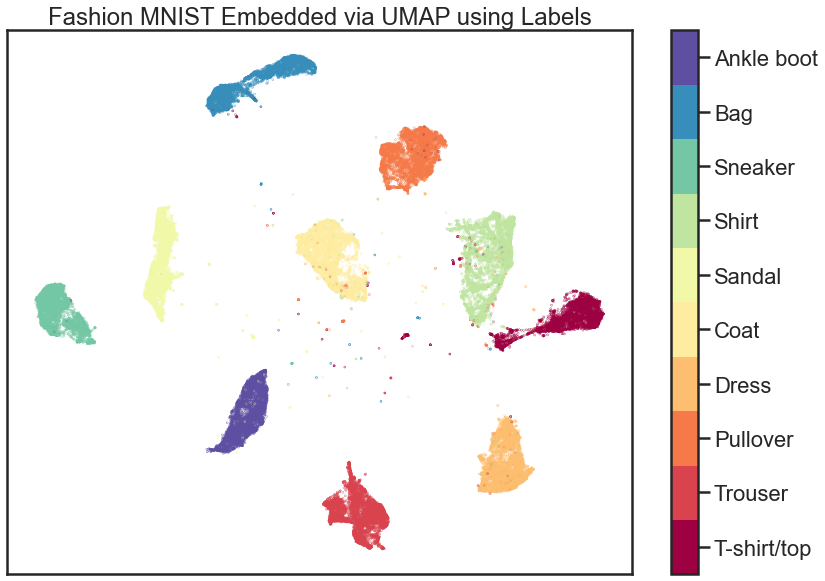

In [19]:
fig, ax = plt.subplots(1, figsize=(14, 10))
plt.scatter(*embedding.T, s=0.1, c=target, cmap='Spectral', alpha=1.0)
plt.setp(ax, xticks=[], yticks=[])
cbar = plt.colorbar(boundaries=np.arange(11)-0.5)
cbar.set_ticks(np.arange(10))
cbar.set_ticklabels(classes)
plt.title('Fashion MNIST Embedded via UMAP using Labels');

Training with Labels and Embedding Unlabelled Test Data (Metric Learning with UMAP)
--------------------------------------------
If we have learned a supervised embedding, can we use that to embed new previously unseen (and now unlabelled) points into the space? This would provide an algorithm for metric learning, where we can use a labelled set of points to learn a metric on data, and then use that learned metric as a measure of distance between new unlabelled points. This can be particularly useful as part of a machine learning pipline where we learn a supervised embedding as a form of supervised feature engineering, and then build a classifier on that new space – this is viable as long as we can pass new data to the embedding model to be transformed to the new space.

In [21]:
train_data = np.array(train)
test_data = np.array(test)

In [22]:
%%time
mapper = umap.UMAP(n_neighbors=10).fit(train_data, np.array(train_labels))

CPU times: user 4min 6s, sys: 10.3 s, total: 4min 16s
Wall time: 52.2 s


In [23]:
%%time
test_embedding = mapper.transform(test_data)

CPU times: user 21.2 s, sys: 1.13 s, total: 22.3 s
Wall time: 12.2 s


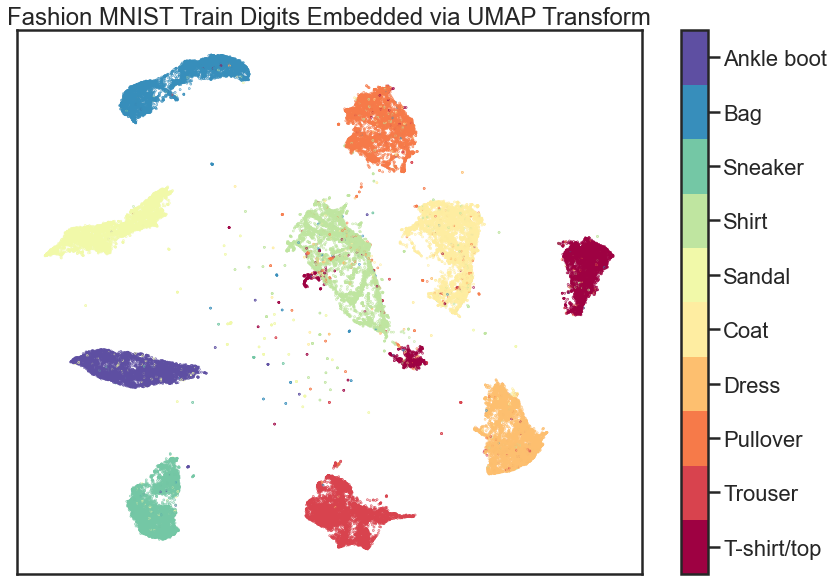

In [24]:
fig, ax = plt.subplots(1, figsize=(14, 10))
plt.scatter(*mapper.embedding_.T, s=0.3, c=np.array(train_labels), cmap='Spectral', alpha=1.0)
plt.setp(ax, xticks=[], yticks=[])
cbar = plt.colorbar(boundaries=np.arange(11)-0.5)
cbar.set_ticks(np.arange(10))
cbar.set_ticklabels(classes)
plt.title('Fashion MNIST Train Digits Embedded via UMAP Transform');

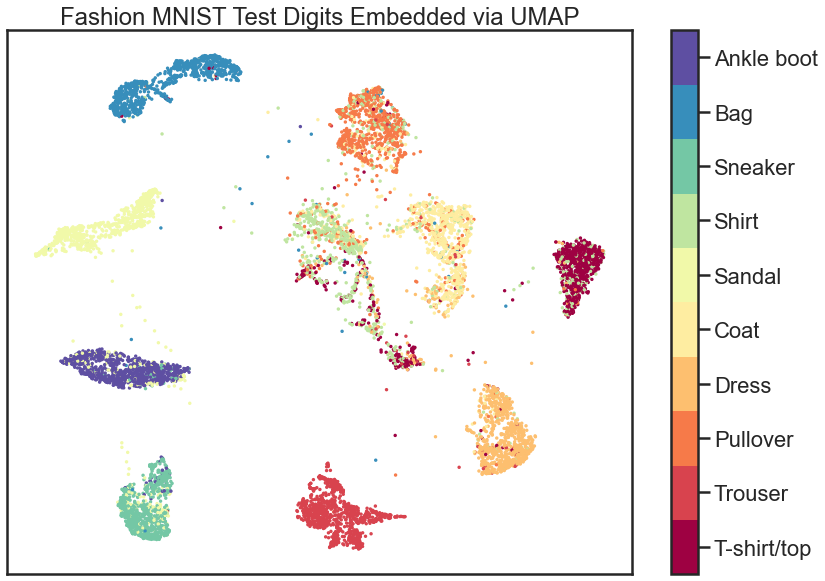

In [26]:
fig, ax = plt.subplots(1, figsize=(14, 10))
plt.scatter(*test_embedding.T, s=2, c=np.array(test_labels), cmap='Spectral', alpha=1.0)
plt.setp(ax, xticks=[], yticks=[])
cbar = plt.colorbar(boundaries=np.arange(11)-0.5)
cbar.set_ticks(np.arange(10))
cbar.set_ticklabels(classes)
plt.title('Fashion MNIST Test Digits Embedded via UMAP');